In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

data_train = pd.read_csv('../data/train.csv')
data_test = pd.read_csv('../data/test.csv')
data_sample = pd.read_csv('../data/sample_submission.csv')

data_train.head(50)

Word  Label
0       Аалтонен      1
1            Аар      0
2          Аарон      0
3          ААРОН      0
4         Аарона      0
5         Аарона      1
6         Аароне      0
7        Ааронов      0
8         Аахена      0
9        Абабков      1
10        абажур      0
11      абажуром      0
12       абажуры      0
13       Абажуры      0
14          абак      0
15       абаками      0
16       Абакана      0
17        абаком      0
18      Абакумов      1
19      Абалкина      1
20    Абатуровым      1
21        Абашев      1
22      Абашидзе      1
23      Абашкина      1
24         Аббас      1
25         АББАС      1
26        Аббаса      1
27       Аббасов      1
28      аббатами      0
29        аббате      0
30      аббатиса      0
31      Аббатиса      0
32      аббатисе      0
33     аббатисой      0
34     Аббатисой      0
35       аббатом      0
36      аббатств      0
37     аббатства      0
38   аббатствами      0
39     Аббатстве      0
40     аббатству      0
41       Абботом      1
42  аббревиатура      0
43  аббревиатура      1
44  аббревиатуры      0
45        Абвилю      0
46       Абделем      0
47    Абдрашитов      1
48         Абдул      0
49        Абдуле      0

In [75]:
data_sample.head()

Id  Prediction
0   0           0
1   1           0
2   2           0
3   3           0
4   4           0

In [76]:
A = []
for index, row in data_train.iterrows():
    b = 0
    for l in row['Word']:
        if l == '-':
            b = 1
    A.append(b)
data_train['is_defis'] = pd.Series(A, index = data_train.index)

A = []
for index, row in data_test.iterrows():
    b = 0
    for l in row['Word']:
        if l == '-':
            b = 1
    A.append(b)
data_test['is_defis'] = pd.Series(A, index = data_test.index)

In [77]:
A = []
for index, row in data_train.iterrows():
    b = 0
    for l in row['Word']:
        if l == ' ':
            b = 1
    A.append(b)
data_train['is_space'] = pd.Series(A, index = data_train.index)

A = []
for index, row in data_test.iterrows():
    b = 0
    for l in row['Word']:
        if l == ' ':
            b = 1
    A.append(b)
data_test['is_space'] = pd.Series(A, index = data_test.index)

In [78]:
A = []
for index, row in data_train.iterrows():
    b = 1
    for l in row['Word']:
        if 'а' <= l <= 'я':
            b = 0
    A.append(b)
data_train['is_CAPS'] = pd.Series(A, index = data_train.index)
A = []
for index, row in data_test.iterrows():
    b = 1
    for l in row['Word']:
        if 'а' <= l <= 'я':
            b = 0
    A.append(b)
data_test['is_CAPS'] = pd.Series(A, index = data_test.index)
data_train

Word  Label  is_defis  is_space  is_CAPS
0         Аалтонен      1         0         0        0
1              Аар      0         0         0        0
2            Аарон      0         0         0        0
3            ААРОН      0         0         0        1
4           Аарона      0         0         0        0
5           Аарона      1         0         0        0
6           Аароне      0         0         0        0
7          Ааронов      0         0         0        0
8           Аахена      0         0         0        0
9          Абабков      1         0         0        0
10          абажур      0         0         0        0
11        абажуром      0         0         0        0
12         абажуры      0         0         0        0
13         Абажуры      0         0         0        0
14            абак      0         0         0        0
15         абаками      0         0         0        0
16         Абакана      0         0         0        0
17          абаком      0         0         0        0
18        Абакумов      1         0         0        0
19        Абалкина      1         0         0        0
20      Абатуровым      1         0         0        0
21          Абашев      1         0         0        0
22        Абашидзе      1         0         0        0
23        Абашкина      1         0         0        0
24           Аббас      1         0         0        0
25           АББАС      1         0         0        1
26          Аббаса      1         0         0        0
27         Аббасов      1         0         0        0
28        аббатами      0         0         0        0
29          аббате      0         0         0        0
...            ...    ...       ...       ...      ...
101378      ящериц      0         0         0        0
101379     ящерица      0         0         0        0
101380    ящерицам      0         0         0        0
101381     ящерице      0         0         0        0
101382     ящерицы      0         0         0        0
101383      ящерка      0         0         0        0
101384      ящерок      0         0         0        0
101385      ящером      0         0         0        0
101386       ящеру      0         0         0        0
101387        ящик      0         0         0        0
101388        ЯЩИК      0         0         0        1
101389        ящик      1         0         0        0
101390       Ящика      0         0         0        0
101391       ЯЩИКА      0         0         0        1
101392      ЯЩИКАМ      0         0         0        1
101393      ящиках      0         0         0        0
101394       ЯЩИКИ      0         0         0        1
101395      ЯЩИКОВ      0         0         0        1
101396      ящиком      0         0         0        0
101397      Ящиком      0         0         0        0
101398     ящичках      0         0         0        0
101399     ящичков      0         0         0        0
101400      ящичку      0         0         0        0
101401        ящур      0         0         0        0
101402       ящура      0         0         0        0
101403       Ёлкин      1         0         0        0
101404       ёлкой      0         0         0        0
101405        ёлок      0         0         0        0
101406     ёлочкой      0         0         0        0
101407     ёмкость      0         0         0        0

[101408 rows x 5 columns]

In [79]:
A = []
for index, row in data_train.iterrows():
    b = 0
    if 'А' <= row['Word'][0] <= 'Я' and row['is_CAPS'] == 0:
        b=1
    A.append(b)
data_train['first_let_CAPS'] = pd.Series(A, index = data_train.index)
A = []
for index, row in data_test.iterrows():
    b = 0
    if 'А' <= row['Word'][0] <= 'Я' and row['is_CAPS'] == 0:
        b=1
    A.append(b)
data_test['first_let_CAPS'] = pd.Series(A, index = data_test.index)
data_train

Word  Label  is_defis  is_space  is_CAPS  first_let_CAPS
0         Аалтонен      1         0         0        0               1
1              Аар      0         0         0        0               1
2            Аарон      0         0         0        0               1
3            ААРОН      0         0         0        1               0
4           Аарона      0         0         0        0               1
5           Аарона      1         0         0        0               1
6           Аароне      0         0         0        0               1
7          Ааронов      0         0         0        0               1
8           Аахена      0         0         0        0               1
9          Абабков      1         0         0        0               1
10          абажур      0         0         0        0               0
11        абажуром      0         0         0        0               0
12         абажуры      0         0         0        0               0
13         Абажуры      0         0         0        0               1
14            абак      0         0         0        0               0
15         абаками      0         0         0        0               0
16         Абакана      0         0         0        0               1
17          абаком      0         0         0        0               0
18        Абакумов      1         0         0        0               1
19        Абалкина      1         0         0        0               1
20      Абатуровым      1         0         0        0               1
21          Абашев      1         0         0        0               1
22        Абашидзе      1         0         0        0               1
23        Абашкина      1         0         0        0               1
24           Аббас      1         0         0        0               1
25           АББАС      1         0         0        1               0
26          Аббаса      1         0         0        0               1
27         Аббасов      1         0         0        0               1
28        аббатами      0         0         0        0               0
29          аббате      0         0         0        0               0
...            ...    ...       ...       ...      ...             ...
101378      ящериц      0         0         0        0               0
101379     ящерица      0         0         0        0               0
101380    ящерицам      0         0         0        0               0
101381     ящерице      0         0         0        0               0
101382     ящерицы      0         0         0        0               0
101383      ящерка      0         0         0        0               0
101384      ящерок      0         0         0        0               0
101385      ящером      0         0         0        0               0
101386       ящеру      0         0         0        0               0
101387        ящик      0         0         0        0               0
101388        ЯЩИК      0         0         0        1               0
101389        ящик      1         0         0        0               0
101390       Ящика      0         0         0        0               1
101391       ЯЩИКА      0         0         0        1               0
101392      ЯЩИКАМ      0         0         0        1               0
101393      ящиках      0         0         0        0               0
101394       ЯЩИКИ      0         0         0        1               0
101395      ЯЩИКОВ      0         0         0        1               0
101396      ящиком      0         0         0        0               0
101397      Ящиком      0         0         0        0               1
101398     ящичках      0         0         0        0               0
101399     ящичков      0         0         0        0               0
101400      ящичку      0         0         0        0               0
101401        ящур      0         0         0        0               0
101402       ящура      0         0   

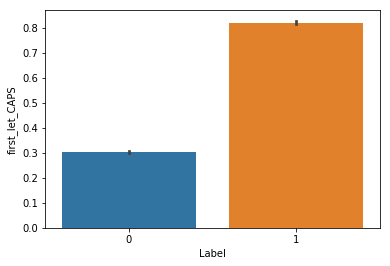

In [80]:
sns.barplot(x="Label", y="first_let_CAPS", data=data_train);

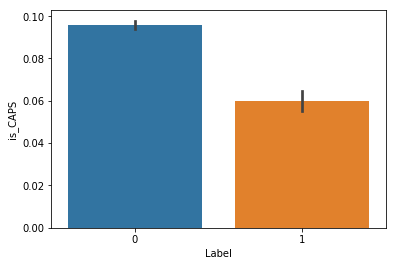

In [81]:
sns.barplot(x="Label", y="is_CAPS", data=data_train);

In [82]:
A = []
for index, row in data_train.iterrows():
    A.append(len(row['Word']))
data_train['lenght'] = pd.Series(A, index = data_train.index)
A = []
for index, row in data_test.iterrows():
    A.append(len(row['Word']))
data_test['lenght'] = pd.Series(A, index = data_test.index)
data_train

Word  Label  is_defis  is_space  is_CAPS  first_let_CAPS  lenght
0         Аалтонен      1         0         0        0               1       8
1              Аар      0         0         0        0               1       3
2            Аарон      0         0         0        0               1       5
3            ААРОН      0         0         0        1               0       5
4           Аарона      0         0         0        0               1       6
5           Аарона      1         0         0        0               1       6
6           Аароне      0         0         0        0               1       6
7          Ааронов      0         0         0        0               1       7
8           Аахена      0         0         0        0               1       6
9          Абабков      1         0         0        0               1       7
10          абажур      0         0         0        0               0       6
11        абажуром      0         0         0        0               0       8
12         абажуры      0         0         0        0               0       7
13         Абажуры      0         0         0        0               1       7
14            абак      0         0         0        0               0       4
15         абаками      0         0         0        0               0       7
16         Абакана      0         0         0        0               1       7
17          абаком      0         0         0        0               0       6
18        Абакумов      1         0         0        0               1       8
19        Абалкина      1         0         0        0               1       8
20      Абатуровым      1         0         0        0               1      10
21          Абашев      1         0         0        0               1       6
22        Абашидзе      1         0         0        0               1       8
23        Абашкина      1         0         0        0               1       8
24           Аббас      1         0         0        0               1       5
25           АББАС      1         0         0        1               0       5
26          Аббаса      1         0         0        0               1       6
27         Аббасов      1         0         0        0               1       7
28        аббатами      0         0         0        0               0       8
29          аббате      0         0         0        0               0       6
...            ...    ...       ...       ...      ...             ...     ...
101378      ящериц      0         0         0        0               0       6
101379     ящерица      0         0         0        0               0       7
101380    ящерицам      0         0         0        0               0       8
101381     ящерице      0         0         0        0               0       7
101382     ящерицы      0         0         0        0               0       7
101383      ящерка      0         0         0        0               0       6
101384      ящерок      0         0         0        0               0       6
101385      ящером      0         0         0        0               0       6
101386       ящеру      0         0         0        0               0       5
101387        ящик      0         0         0        0               0       4
101388        ЯЩИК      0         0         0        1               0       4
101389        ящик      1         0         0        0               0       4
101390       Ящика      0         0         0        0               1       5
101391       ЯЩИКА      0         0         0        1               0       5
101392      ЯЩИКАМ      0         0         0        1               0       6
101393      ящиках      0         0         0        0               0       6
101394       ЯЩИКИ      0         0         0        1               0       5
101395      ЯЩИКОВ      0         0         0        1               0       6
101396      ящиком      0         0         0        0          

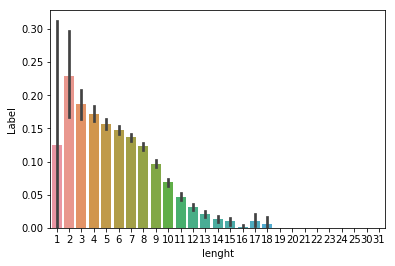

In [83]:
sns.barplot(x="lenght", y="Label", data=data_train);

In [84]:
data_train[(data_train['lenght'] == 2) & (data_train['first_let_CAPS'] == 1) & (data_train['Label'] == 1)].shape[0] / data_train[(data_train['lenght'] == 2) & (data_train['first_let_CAPS'] == 1)].shape[0]

0.3157894736842105

In [85]:
A = []
for index, row in data_train.iterrows():
    b = 0
    if (len(row['Word']) >= 2):
        A.append((row['Word'][-2] + row['Word'][-1]).lower())
    else:
        A.append(row['Word'][0].lower())
data_train['is_ov'] = pd.Series(A, index = data_train.index)
A = []
for index, row in data_test.iterrows():
    b = 0
    if (len(row['Word']) >= 2):
        A.append((row['Word'][-2] + row['Word'][-1]).lower())
    else:
        A.append(row['Word'][0].lower())
data_test['is_ov'] = pd.Series(A, index = data_test.index)
data_train.sample(100)

Word  Label  is_defis  is_space  is_CAPS  first_let_CAPS  \
83296      Странником      0         0         0        0               1   
99374    экскурсоводы      0         0         0        0               0   
11839         Вилером      1         0         0        0               1   
36771   концессионере      0         0         0        0               0   
8789      бронепоезду      0         0         0        0               0   
9548         Буткевич      1         0         0        0               1   
99185       экватором      0         0         0        0               0   
94360         Химикат      0         0         0        0               1   
35785   комплектующим      0         0         0        0               0   
78309            сини      0         0         0        0               0   
56860       очеркиста      0         0         0        0               0   
37293       Королевым      1         0         0        0               1   
88334          трусих      0         0         0        0               0   
86609      тиранозавр      0         0         0        0               0   
1054              АЗС      0         0         0        1               0   
84057           СУЕТА      0         0         0        1               0   
31887         Капканы      0         0         0        0               1   
96413          червах      0         0         0        0               0   
79796           Смогу      0         0         0        0               1   
53889         ознобов      0         0         0        0               0   
7107           Бланка      1         0         0        0               1   
10003        Валенсия      0         0         0        0               1   
50829      неприятеля      0         0         0        0               0   
62151         Поднаем      0         0         0        0               1   
98440        Штайнера      1         0         0        0               1   
3223       АРИСТОКРАТ      0         0         0        1               0   
76724           Своды      0         0         0        0               1   
22428           дожде      0         0         0        0               0   
68285      пролетарии      0         0         0        0               0   
28356          Избелл      1         0         0        0               1   
...               ...    ...       ...       ...      ...             ...   
40422     Легкомыслие      0         0         0        0               1   
85345           татар      0         0         0        0               0   
9670           Бушуев      1         0         0        0               1   
50291      недоумения      0         0         0        0               0   
7200            Блику      0         0         0        0               1   
53843           Ожоги      0         0         0        0               1   
1789          АЛЬБЕРТ      0         0         0        1               0   
24289          ельцов      0         0         0        0               0   
52339         Обаянье      0         0         0        0               1   
8262        брадобрей      0         0         0        0               0   
29202  Инвестировании      0         0         0        0               1   
79113     скрипучести      0         0         0        0               0   
37594    косноязычием      0         0         0        0               0   
6803         Биологов      0         0         0        0               1   
72765      резонансах      0         0         0        0               0   
37045         Корветы      0         0         0        0               1   
42534         Людвиге      0         0         0        0               1   
13899       встречами      0         0         0        0               0   
32321          КАРСОН      0         0         0        1               0   
59071     переигровки      0         0         0        0               0   
66116    преп

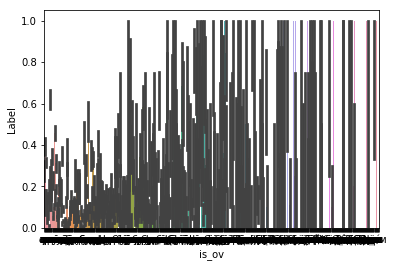

In [86]:
sns.barplot(x="is_ov", y="Label", data=data_train);

In [87]:
rs = pd.read_csv('../data/russian_surnames.csv', sep=';')
rs

ID      Surname  Sex  PeoplesCount     WhenPeoplesCount  \
0            1     Аалферов  NaN             0  30.06.2016 17:25:47   
1            2    Аалферова  NaN             1  21.05.2016 14:21:30   
2            3         Ааль  NaN            95  21.05.2016 14:21:39   
3            4        Ааман  NaN            24  21.05.2016 14:21:49   
4            5       Аамана  NaN             0   20.06.2016 0:50:51   
5            6      Ааманая  NaN             1  21.05.2016 14:22:10   
6            7      Ааманий  NaN             2  21.05.2016 14:22:19   
7            8     Аандреев  NaN             7   02.07.2016 4:16:54   
8            9    Аандреева  NaN            12  21.05.2016 14:22:31   
9           10        Аарон  NaN          2000  21.05.2016 14:22:40   
10          11      Ааронов  NaN            44  30.06.2016 17:25:55   
11          12     Ааронова  NaN            24  21.05.2016 14:22:50   
12          13           Аб  NaN          9000  21.05.2016 14:22:59   
13          14   Абабакиров  NaN            90  30.06.2016 17:26:03   
14          15  Абабакирова  NaN            58  21.05.2016 14:23:31   
15          16     Абабилов  NaN            58  21.05.2016 14:23:40   
16          17    Абабилова  NaN            62  21.05.2016 14:23:50   
17          18      Абабков  NaN           738  21.05.2016 14:23:59   
18          19     Абабкова  NaN           838   20.06.2016 0:51:32   
19          20      Абагаев  NaN            58   02.07.2016 4:17:03   
20          21     Абагаева  NaN            77  21.05.2016 14:24:19   
21          22       Абаган  NaN            27  21.05.2016 14:24:29   
22          23       Абагов  NaN            24  30.06.2016 17:26:12   
23          24      Абагова  NaN            32  21.05.2016 14:24:40   
24          25       Абагян  NaN           310  21.05.2016 14:24:49   
25          26      Абадаев  NaN            63  21.05.2016 14:25:00   
26          27     Абадаева  NaN           103  21.05.2016 14:25:11   
27          28     Абадашев  NaN             2  21.05.2016 14:25:19   
28          29    Абадашева  NaN             0  21.06.2016 11:25:50   
29          30      Абадеев  NaN            49   02.07.2016 4:17:10   
...        ...          ...  ...           ...                  ...   
318444  318445        Ящеко  NaN             3  19.06.2016 20:44:59   
318445  318446     Ящемская  NaN            22   23.06.2016 3:15:11   
318446  318447     Ящемский  NaN            12  19.06.2016 20:45:08   
318447  318448       Ященко  NaN         20000  19.06.2016 20:45:16   
318448  318449      Ященков  NaN           301  19.06.2016 20:45:24   
318449  318450     Ященкова  NaN           407  19.06.2016 20:45:32   
318450  318451     Ящерицын  NaN            61  19.06.2016 20:45:40   
318451  318452    Ящерицына  NaN            61  22.06.2016 17:53:38   
318452  318453       Ящиков  NaN           152   02.07.2016 4:16:47   
318453  318454      Ящикова  NaN            48  19.06.2016 20:45:48   
318454  318455         Ящин  NaN            73  19.06.2016 20:45:56   
318455  318456        Ящина  NaN            77  19.06.2016 20:46:04   
318456  318457       Ящинин  NaN            12  19.06.2016 20:46:12   
318457  318458      Ящинина  NaN            10  19.06.2016 20:46:19   
318458  318459     Ящинская  NaN            47   23.06.2016 3:15:19   
318459  318460     Ящинский  NaN            18  19.06.2016 20:46:29   
318460  318461       Ящишен  NaN           147  19.06.2016 20:46:36   
318461  318462       Ящишин  NaN           806  19.06.2016 20:46:44   
318462  318463      Ящишина  NaN           357  19.06.2016 20:46:52   
318463  318464         Ящук  NaN          9000  19.06.2016 20:47:00   
318464  318465       Ящуков  NaN            34  19.06.2016 20:47:08   
318465  318466      Ящукова  NaN            47  19.06.2016 20:47:16   
318466  318467         Ящун  NaN            87  19.06.2016 20:47:25   
318467  318468     Ящунская  NaN             1   23.06.2016 3:15:27   
318468  318469     Ящунский  NaN    

In [88]:
rs = rs.drop(['ID', 'Sex', 'PeoplesCount', 'WhenPeoplesCount', 'Source'], axis=1)
rs

Surname
0          Аалферов
1         Аалферова
2              Ааль
3             Ааман
4            Аамана
5           Ааманая
6           Ааманий
7          Аандреев
8         Аандреева
9             Аарон
10          Ааронов
11         Ааронова
12               Аб
13       Абабакиров
14      Абабакирова
15         Абабилов
16        Абабилова
17          Абабков
18         Абабкова
19          Абагаев
20         Абагаева
21           Абаган
22           Абагов
23          Абагова
24           Абагян
25          Абадаев
26         Абадаева
27         Абадашев
28        Абадашева
29          Абадеев
...             ...
318444        Ящеко
318445     Ящемская
318446     Ящемский
318447       Ященко
318448      Ященков
318449     Ященкова
318450     Ящерицын
318451    Ящерицына
318452       Ящиков
318453      Ящикова
318454         Ящин
318455        Ящина
318456       Ящинин
318457      Ящинина
318458     Ящинская
318459     Ящинский
318460       Ящишен
318461       Ящишин
318462      Ящишина
318463         Ящук
318464       Ящуков
318465      Ящукова
318466         Ящун
318467     Ящунская
318468     Ящунский
318469         Ящуп
318470       Ящупов
318471      Ящупова
318472        Ящура
318473       Яяпмей

[318474 rows x 1 columns]

In [89]:
d = {}
for index, row in rs.iterrows():
    d[row['Surname']] = 1
#A = []
#for index, row in data_train.iterrows():
#    b = 0
#    for tindex, trow in rs.iterrows():
#        if trow['Surname'].lower() == row['Word'].lower():
#            A.append(1)
#            b=1
#            break
#    if b == 0:
#        A.append(0)
    
#data_train['is_cool'] = pd.Series(A, index = data_train.index)

In [90]:
A = []
for index, row in data_train.iterrows():
    b = 0
    if row['Word'] in d.keys():
        A.append(1)
    else:
        A.append(0)
data_train['is_cool'] = pd.Series(A, index = data_train.index)

A = []
for index, row in data_test.iterrows():
    b = 0
    if row['Word'] in d.keys():
        A.append(1)
    else:
        A.append(0)
data_test['is_cool'] = pd.Series(A, index = data_test.index)

In [91]:
data_train

Word  Label  is_defis  is_space  is_CAPS  first_let_CAPS  \
0         Аалтонен      1         0         0        0               1   
1              Аар      0         0         0        0               1   
2            Аарон      0         0         0        0               1   
3            ААРОН      0         0         0        1               0   
4           Аарона      0         0         0        0               1   
5           Аарона      1         0         0        0               1   
6           Аароне      0         0         0        0               1   
7          Ааронов      0         0         0        0               1   
8           Аахена      0         0         0        0               1   
9          Абабков      1         0         0        0               1   
10          абажур      0         0         0        0               0   
11        абажуром      0         0         0        0               0   
12         абажуры      0         0         0        0               0   
13         Абажуры      0         0         0        0               1   
14            абак      0         0         0        0               0   
15         абаками      0         0         0        0               0   
16         Абакана      0         0         0        0               1   
17          абаком      0         0         0        0               0   
18        Абакумов      1         0         0        0               1   
19        Абалкина      1         0         0        0               1   
20      Абатуровым      1         0         0        0               1   
21          Абашев      1         0         0        0               1   
22        Абашидзе      1         0         0        0               1   
23        Абашкина      1         0         0        0               1   
24           Аббас      1         0         0        0               1   
25           АББАС      1         0         0        1               0   
26          Аббаса      1         0         0        0               1   
27         Аббасов      1         0         0        0               1   
28        аббатами      0         0         0        0               0   
29          аббате      0         0         0        0               0   
...            ...    ...       ...       ...      ...             ...   
101378      ящериц      0         0         0        0               0   
101379     ящерица      0         0         0        0               0   
101380    ящерицам      0         0         0        0               0   
101381     ящерице      0         0         0        0               0   
101382     ящерицы      0         0         0        0               0   
101383      ящерка      0         0         0        0               0   
101384      ящерок      0         0         0        0               0   
101385      ящером      0         0         0        0               0   
101386       ящеру      0         0         0        0               0   
101387        ящик      0         0         0        0               0   
101388        ЯЩИК      0         0         0        1               0   
101389        ящик      1         0         0        0               0   
101390       Ящика      0         0         0        0               1   
101391       ЯЩИКА      0         0         0        1               0   
101392      ЯЩИКАМ      0         0         0        1               0   
101393      ящиках      0         0         0        0               0   
101394       ЯЩИКИ      0         0         0        1               0   
101395      ЯЩИКОВ      0         0         0        1               0   
101396      ящиком      0         0         0        0               0   
101397      Ящиком      0         0         0        0               1   
101398     ящичках      0         0         0        0               0   
101399     ящичков      0         0         0        0               0   
101400      ящичку

In [92]:
from sklearn import preprocessing
def encode_features(df_train, df_test):
    features = ['Word', 'is_ov']
    df_combined = pd.concat([df_train[features], df_test[features]])
    
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(df_combined[feature])
        df_train[feature] = le.transform(df_train[feature])
        df_test[feature] = le.transform(df_test[feature])
    return df_train, df_test
    
data_train, data_test = encode_features(data_train, data_test)
data_train.head()

Word  Label  is_defis  is_space  is_CAPS  first_let_CAPS  lenght  is_ov  \
0  1137      1         0         0        0               1       8    162   
1  1138      0         0         0        0               1       3     39   
2  1141      0         0         0        0               1       5    394   
3     6      0         0         0        1               0       5    394   
4  1142      0         0         0        0               1       6    350   

   is_cool  
0        0  
1        0  
2        1  
3        0  
4        0

In [93]:
from sklearn.model_selection import train_test_split

X_all = data_train.drop(['Word', 'Label'], axis=1)
y_all = data_train['Label']

num_test = 0.20
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=num_test, random_state=23)

In [94]:
X_test

is_defis  is_space  is_CAPS  first_let_CAPS  lenght  is_ov  is_cool
24817          0         0        0               1       9    219        0
48753          0         0        0               1       6    161        0
90274          0         0        1               0      13    161        0
2886           0         0        0               1       9    568        0
89958          0         0        0               0      10    504        0
17063          0         0        0               0       7    393        0
28300          0         0        0               0      10     35        0
97879          0         0        0               1       7    407        0
63697          0         0        0               0       7    391        0
77620          0         0        0               0      10    331        0
27153          0         0        0               1       7     79        0
639            0         0        1               0       9    728        0
82302          0         0        0               1       5    307        0
88837          0         0        0               0       7    367        0
33446          0         0        1               0       7    437        0
18032          0         0        0               0      11    282        0
7173           0         0        0               1       9     35        0
61903          0         0        0               1       6    394        0
2644           0         0        0               0      10    158        0
17743          0         0        0               1       7    154        0
61679          0         0        0               0      10    271        0
13590          0         0        0               0      10    218        0
67129          0         0        0               0       9    393        0
4008           0         0        0               0       8    354        0
10334          0         0        0               1       8    510        0
7906           0         0        0               0       5    188        0
38904          1         0        0               1      13     36        0
99023          0         0        0               1       5    442        0
30514          0         0        0               1      13    298        0
6585           0         0        0               1       7    383        1
...          ...       ...      ...             ...     ...    ...      ...
36376          0         0        0               1      12    235        0
14564          0         0        0               0      11    218        0
27787          0         0        0               0       8    393        0
100784         0         0        0               1       4    397        0
67179          0         0        0               1       7    127        0
28320          0         0        0               0       9    171        0
2025           0         0        0               1      10     74        1
23871          0         0        0               1      10    393        0
70715          0         0        0               0      14    331        0
37321          0         0        0               1       8    437        0
70075          0         0        0               1       4    513        0
71054          0         0        0               0       9    218        0
37125          0         0        0               0      10    634        0
39949          0         0        0               1       4    278        0
989            0         0        0               0       9    161        0
74228          0         0        0               1       8    307        0
33432          0         0        0               1      17    319        0
79544          0         0        0               1       8    391        0
49325          0         0        0               1       6    484        0
10976          0         0        0               0      15    214        0
67091          0         0        1               0     

In [95]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, 
                              GradientBoostingClassifier, ExtraTreesClassifier)
from sklearn.svm import SVC
import sklearn

class SklearnHelper(object):
    def __init__(self, clf, seed=0, params=None):
        params['random_state'] = seed
        self.clf = clf(**params)

    def train(self, x_train, y_train):
        self.clf.fit(x_train, y_train)

    def predict(self, x):
        return self.clf.predict(x)
    
    def fit(self,x,y):
        return self.clf.fit(x,y)
    
    def feature_importances(self,x,y):
        print(self.clf.fit(x,y).feature_importances_)
        
ntrain = data_train.shape[0]
ntest = data_test.shape[0]
SEED = 0 # for reproducibility
NFOLDS = 5 # set folds for out-of-fold prediction
kf = KFold(ntrain, n_folds= NFOLDS, random_state=SEED)

# Choose the type of classifier. 
#clf = RandomForestClassifier()

# Choose some parameter combinations to try
#parameters = {'n_estimators': [4, 6, 9], 
#              'max_features': ['log2', 'sqrt','auto'], 
#              'criterion': ['entropy', 'gini'],
#              'max_depth': [2, 3, 5, 10], 
#              'min_samples_split': [2, 3, 5],
#              'min_samples_leaf': [1,5,8]
#             }

# Type of scoring used to compare parameter combinations
#acc_scorer = make_scorer(accuracy_score)

# Run the grid search
#grid_obj = GridSearchCV(clf, parameters, scoring=acc_scorer)
#grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
#clf = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
#clf.fit(X_train, y_train)

# Gradient Boosting parameters
# Put in our parameters for said classifiers
# Random Forest parameters
rf_params = {
    'n_jobs': -1,
    'n_estimators': 500,
     'warm_start': True, 
     #'max_features': 0.2,
    'max_depth': 6,
    'min_samples_leaf': 2,
    'max_features' : 'sqrt',
    'verbose': 0
}

# Extra Trees Parameters
et_params = {
    'n_jobs': -1,
    'n_estimators':500,
    #'max_features': 0.5,
    'max_depth': 8,
    'min_samples_leaf': 2,
    'verbose': 0
}

# AdaBoost parameters
ada_params = {
    'n_estimators': 500,
    'learning_rate' : 0.75
}

# Gradient Boosting parameters
gb_params = {
    'n_estimators': 500,
     #'max_features': 0.2,
    'max_depth': 5,
    'min_samples_leaf': 2,
    'verbose': 0
}

# Support Vector Classifier parameters 
svc_params = {
    'kernel' : 'linear',
    'C' : 0.025
    }

gb = SklearnHelper(clf=GradientBoostingClassifier, seed=SEED, params=gb_params)

y_train = data_train['Label'].ravel()
data_train = data_train.drop(['Label'], axis=1)
x_train = data_train.values # Creates an array of the train data
x_test = data_test.values # Creats an array of the test data

In [63]:
def get_oof(clf, x_train, y_train, x_test):
    oof_train = np.zeros((ntrain,))
    oof_test = np.zeros((ntest,))
    oof_test_skf = np.empty((NFOLDS, ntest))

    for i, (train_index, test_index) in enumerate(kf):
        x_tr = x_train[train_index]
        y_tr = y_train[train_index]
        x_te = x_train[test_index]

        clf.train(x_tr, y_tr)

        oof_train[test_index] = clf.predict(x_te)
        oof_test_skf[i, :] = clf.predict(x_test)

    oof_test[:] = oof_test_skf.mean(axis=0)
    return oof_train.reshape(-1, 1), oof_test.reshape(-1, 1)

gb_oof_train, gb_oof_test = get_oof(gb,x_train, y_train, x_test) 

In [65]:
gbm = xgb.XGBClassifier(
    #learning_rate = 0.02,
 n_estimators= 2000,
 max_depth= 4,
 min_child_weight= 2,
 #gamma=1,
 gamma=0.9,                        
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread= -1,
 scale_pos_weight=1).fit(x_train, y_train)
predictions = gbm.predict(x_test)

/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [245]:
ids = data_test['Word']
predictions = clf.predict(data_test.drop(['Word'], axis=1))


output = pd.DataFrame({ 'Word' : ids, 'Prediction': predictions })
A = []
for index, row in output.iterrows():
    A.append(index)
output['Id'] = pd.Series(A, index = output.index)
temp = output['Prediction']
output = output.drop(['Prediction', 'Word'], axis=1)
output['Prediction'] = pd.Series(temp, index = output.index)
output.to_csv('titanic-predictions.csv', index = False)
output.head()

Id  Prediction
0   0           0
1   1           0
2   2           0
3   3           0
4   4           0

In [250]:
data_train.sample(50)

Word  Label  is_defis  is_space  is_CAPS  first_let_CAPS  \
42244         лунатикам      0         0         0        0               0   
6788          Биографии      0         0         0        0               1   
8016        бормотанием      0         0         0        0               0   
66101        Препаратам      0         0         0        0               1   
84847           таблицу      0         0         0        0               0   
43128           Макрель      0         0         0        0               1   
55130             Орика      0         0         0        0               1   
8353          Брансуика      0         0         0        0               1   
9740               быту      0         0         0        0               0   
99713   Электропроводка      0         0         0        0               1   
73498          Реформах      0         0         0        0               1   
96809             Чинам      0         0         0        0               1   
32111            Кардер      1         0         0        0               1   
39218           Кумушка      0         0         0        0               1   
40876     летосчисления      0         0         0        0               0   
56655            ОФЕРТА      0         0         0        1               0   
83928         суворовцы      0         0         0        0               0   
76792           Связная      0         0         0        0               1   
1196            аккаунт      0         0         0        0               0   
100085          Энергии      0         0         0        0               1   
50019         НЕВОЛЬНИК      0         0         0        1               0   
91936       ферментация      0         0         0        0               0   
84680           Сырости      0         0         0        0               1   
100695          Юбилеев      0         0         0        0               1   
94973           хотенья      0         0         0        0               0   
49197        нарастание      0         0         0        0               0   
52285           Нянечка      0         0         0        0               1   
1277          акростихи      0         0         0        0               0   
36734      концентрация      1         0         0        0               0   
48294          мёртвыми      0         0         0        0               0   
60392          пинчером      0         0         0        0               0   
8915             Брутон      1         0         0        0               1   
11336         вещателям      0         0         0        0               0   
84322              Суси      0         0         0        0               1   
76644        свинофермы      0         0         0        0               0   
52084             Ноэли      0         0         0        0               1   
47168       Монументами      0         0         0        0               1   
93446           фугаски      0         0         0        0               0   
18056         гражданки      0         0         0        0               0   
64911       Потрошитель      0         0         0        0               1   
7850              болях      0         0         0        0               0   
58091           пасынке      0         0         0        0               0   
82525       статистиках      0         0         0        0               0   
51526    нитроглицерине      0         0         0        0               0   
76085         сарабанду      0         0         0        0               0   
76228              Саха      1         0         0        0               1   
29209        инвестиций      0         0         0        0               0   
48221            мякине      0         0         0        0               0   
80319      совладельцев      0         0         0        0               0   
32024          карапузу      0         0         0        0          